In [1]:
import pandas as pd

### 1. Loading IMDB 50K review dataset

In [2]:
# Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
data = pd.read_csv('imdb_dataset.csv')
df = pd.DataFrame(data)
df

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [3]:
positive = df[df['sentiment']=="positive"]
negative = df[df['sentiment']=="negative"]

In [4]:
count = { "positive": len(positive), "negative": len(negative)}
count_df = pd.DataFrame(count.items(),columns=['Sentiment','Count'])
count_df

,Sentiment,Count
0,positive,25000
1,negative,25000


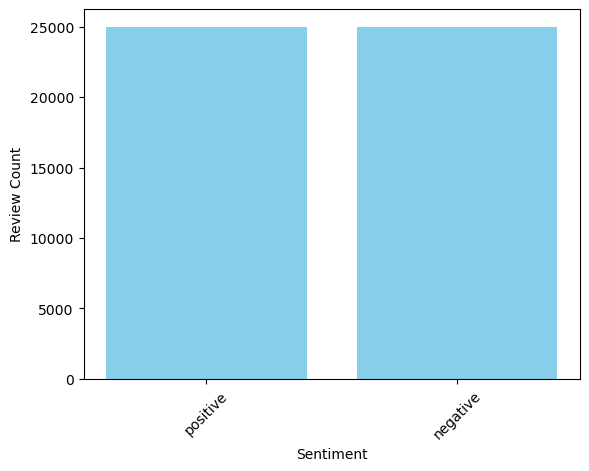

In [5]:
import matplotlib.pyplot as plt
plt.bar(count_df['Sentiment'],count_df['Count'],color="skyblue")
plt.xlabel('Sentiment')
plt.ylabel('Review Count')
plt.xticks(rotation=45)
plt.show()

In [6]:
df.iloc[1]['review']

'A wonderful little production. <br /><br />The filming technique is very unassuming- very old-time-BBC fashion and gives a comforting, and sometimes discomforting, sense of realism to the entire piece. <br /><br />The actors are extremely well chosen- Michael Sheen not only "has got all the polari" but he has all the voices down pat too! You can truly see the seamless editing guided by the references to Williams\' diary entries, not only is it well worth the watching but it is a terrificly written and performed piece. A masterful production about one of the great master\'s of comedy and his life. <br /><br />The realism really comes home with the little things: the fantasy of the guard which, rather than use the traditional \'dream\' techniques remains solid then disappears. It plays on our knowledge and our senses, particularly with the scenes concerning Orton and Halliwell and the sets (particularly of their flat with Halliwell\'s murals decorating every surface) are terribly well d

In [7]:
df.iloc[3]['review']

"Basically there's a family where a little boy (Jake) thinks there's a zombie in his closet & his parents are fighting all the time.<br /><br />This movie is slower than a soap opera... and suddenly, Jake decides to become Rambo and kill the zombie.<br /><br />OK, first of all when you're going to make a film you must Decide if its a thriller or a drama! As a drama the movie is watchable. Parents are divorcing & arguing like in real life. And then we have Jake with his closet which totally ruins all the film! I expected to see a BOOGEYMAN similar movie, and instead i watched a drama with some meaningless thriller spots.<br /><br />3 out of 10 just for the well playing parents & descent dialogs. As for the shots with Jake: just ignore them."

### 2. Proprocessing on reviews 
#### I. Removing HTML tags.
#### II. Removing special chars.
#### III. Lowercasing reviews.

In [8]:
import string 
exclude = string.punctuation

In [9]:
import re
def remove_html_tags(text):
    pat = re.compile('<.*?>')
    return re.sub(pat,'',text)

In [7]:
df['review'] = df['review'].apply(remove_html_tags)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. The filming tec...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [10]:
def remove_special_chars(text):
    return text.translate(str.maketrans('','',exclude))

In [11]:
df['review'] = df['review'].apply(remove_special_chars)
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production br br The filmin...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically theres a family where a little boy J...,negative
4,Petter Matteis Love in the Time of Money is a ...,positive


In [12]:
def lowercasing(text):
    return text.lower()

In [13]:
df['review'] = df['review'].apply(lowercasing)
df.head()

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


### 3. Finding the followings:
#####    Corpus: Number of words in the dataset
#####   Vocabulary: number of unique words in corpus
#####    Documents: number of rows in dataset

In [14]:
corpus = [j for i in df['review'] for j in i.split()]
len(corpus)

11512912

In [15]:
vocabularoy = set(j for i in df['review'] for j in i.split())
len(vocabularoy)

181685

In [16]:
documents = df['review']
len(documents)

50000

### 4. One Hot Encoding: convert categorical data into a numerical format

In [17]:
ohe_map,count = dict(),1
for i in vocabularoy:
    ohe_map[i] = count
    count += 1

In [18]:
ohe_map['one'],ohe_map['i']

(148164, 37781)

In [43]:
ohe = []
for row in df['review']:
    encode = [ohe_map[word] for word in row.split()]
    ohe.append(encode)
ohe[0]

[222667,
 194912,
 39951,
 11844,
 206847,
 28767,
 148368,
 66694,
 118725,
 60195,
 110748,
 145544,
 14118,
 218094,
 133559,
 29744,
 188840,
 174739,
 186252,
 172547,
 44567,
 204572,
 170041,
 94462,
 50737,
 24175,
 28708,
 193261,
 35878,
 87684,
 66694,
 115935,
 102922,
 99469,
 14118,
 176142,
 43167,
 25562,
 158941,
 72566,
 184749,
 194912,
 198378,
 163628,
 151179,
 186664,
 172547,
 180824,
 39951,
 212705,
 194009,
 13647,
 102922,
 204572,
 170041,
 55491,
 138359,
 142944,
 128384,
 39951,
 195857,
 86284,
 129629,
 22793,
 204572,
 142944,
 169298,
 208679,
 56460,
 28708,
 85867,
 211693,
 125115,
 120906,
 129629,
 198378,
 43167,
 170041,
 37845,
 186664,
 39951,
 198659,
 180766,
 194912,
 39951,
 7306,
 170041,
 63896,
 14118,
 44567,
 66694,
 170041,
 39951,
 31884,
 89454,
 211693,
 39951,
 191878,
 216064,
 183697,
 165820,
 167243,
 193917,
 181465,
 119396,
 114867,
 114802,
 22418,
 165066,
 190388,
 93044,
 194912,
 39951,
 179238,
 46667,
 18794,
 399

### 5. Bag Of Words: Bag of Words model is used to preprocess the text by converting it into a bag of words, which keeps a count of the total occurrences of most frequently used words.

In [49]:
import nltk
nltk.download('punkt_tab')
word2count = {}
for line in df['review']:
    words = nltk.word_tokenize(line)
    for word in words: 
        if word not in word2count.keys(): 
            word2count[word] = 1
        else: 
            word2count[word] += 1

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\prash\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt_tab.zip.


In [53]:
import heapq 
freq_words = heapq.nlargest(100, word2count, key=word2count.get)
freq_words

['the',
 'and',
 'a',
 'of',
 'to',
 'is',
 'in',
 'it',
 'i',
 'this',
 'that',
 'was',
 'as',
 'with',
 'for',
 'movie',
 'but',
 'film',
 'on',
 'not',
 'you',
 'are',
 'his',
 'have',
 'be',
 'he',
 'one',
 'its',
 'at',
 'all',
 'by',
 'an',
 'they',
 'who',
 'from',
 'like',
 'so',
 'or',
 'just',
 'her',
 'about',
 'has',
 'out',
 'if',
 'some',
 'what',
 'there',
 'good',
 'more',
 'very',
 'when',
 'even',
 'up',
 'no',
 'my',
 'would',
 'can',
 'she',
 'time',
 'only',
 'which',
 'really',
 'their',
 'see',
 'were',
 'story',
 'had',
 'me',
 'than',
 'much',
 'we',
 'well',
 'been',
 'get',
 'will',
 'into',
 'other',
 'great',
 'do',
 'bad',
 'because',
 'also',
 'people',
 'how',
 'most',
 'him',
 'first',
 'dont',
 'movies',
 'made',
 'then',
 'them',
 'make',
 'films',
 'could',
 'way',
 'any',
 'too',
 'characters',
 'after']

In [59]:
import numpy as np
X = [] 
count = 0
for line in df['review']:
    vector = [] 
    if count>=100: break
    for word in freq_words: 
        if word in nltk.word_tokenize(line): 
            vector.append(1) 
        else: 
            vector.append(0) 
    X.append(vector)
    count += 1
X = np.asarray(X)

In [61]:
X

array([[1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 1, 0, 0],
       [1, 1, 1, ..., 1, 1, 0],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [1, 1, 1, ..., 0, 0, 1],
       [1, 1, 1, ..., 0, 0, 0]])

### 6. N-grams: This technique used to analyze the frequency of sequences of words or characters in a text.

In [19]:
from sklearn.feature_extraction.text import CountVectorizer

In [20]:
cv = CountVectorizer(ngram_range=(2,2))
ngram = cv.fit_transform(df['review'][:20])

In [21]:
cv.get_feature_names_out()

array(['10 just', '10 lines', '10 most', ..., 'youre going', 'zombie in',
       'zombiebr br'], dtype=object)

In [22]:
ngram.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [23]:
cv.vocabulary_

{'one of': 1535,
 'of the': 1485,
 'the other': 2130,
 'other reviewers': 1573,
 'reviewers has': 1734,
 'has mentioned': 855,
 'mentioned that': 1285,
 'that after': 2008,
 'after watching': 43,
 'watching just': 2476,
 'just oz': 1119,
 'oz episode': 1591,
 'episode youll': 597,
 'youll be': 2653,
 'be hooked': 245,
 'hooked they': 912,
 'they are': 2224,
 'are right': 177,
 'right as': 1738,
 'as this': 205,
 'this is': 2249,
 'is exactly': 1015,
 'exactly what': 619,
 'what happened': 2515,
 'happened with': 844,
 'with mebr': 2577,
 'mebr br': 1279,
 'br the': 340,
 'the first': 2084,
 'first thing': 716,
 'thing that': 2235,
 'that struck': 2026,
 'struck me': 1954,
 'me about': 1265,
 'about oz': 18,
 'oz was': 1592,
 'was its': 2444,
 'its brutality': 1079,
 'brutality and': 357,
 'and unflinching': 136,
 'unflinching scenes': 2378,
 'scenes of': 1786,
 'of violence': 1496,
 'violence which': 2420,
 'which set': 2537,
 'set in': 1828,
 'in right': 973,
 'right from': 1740,
 'fr

In [24]:
cv2 = CountVectorizer(ngram_range=(3,3))
ngram2 = cv2.fit_transform(df['review'][:20])

In [25]:
cv2.vocabulary_

{'one of the': 1704,
 'of the other': 1639,
 'the other reviewers': 2358,
 'other reviewers has': 1748,
 'reviewers has mentioned': 1918,
 'has mentioned that': 929,
 'mentioned that after': 1413,
 'that after watching': 2206,
 'after watching just': 44,
 'watching just oz': 2784,
 'just oz episode': 1243,
 'oz episode youll': 1770,
 'episode youll be': 657,
 'youll be hooked': 2978,
 'be hooked they': 268,
 'hooked they are': 991,
 'they are right': 2471,
 'are right as': 194,
 'right as this': 1922,
 'as this is': 225,
 'this is exactly': 2502,
 'is exactly what': 1115,
 'exactly what happened': 679,
 'what happened with': 2822,
 'happened with mebr': 917,
 'with mebr br': 2888,
 'mebr br the': 1407,
 'br the first': 375,
 'the first thing': 2305,
 'first thing that': 781,
 'thing that struck': 2484,
 'that struck me': 2225,
 'struck me about': 2151,
 'me about oz': 1393,
 'about oz was': 18,
 'oz was its': 1771,
 'was its brutality': 2746,
 'its brutality and': 1202,
 'brutality and

In [26]:
ngram2.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 1, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

### 7. TF-IDF (Term Frequency-Inverse Document Frequency) is a statistical measure used in natural language processing and information retrieval to evaluate the importance of a word in a document relative to a collection of documents (corpus)

In [27]:
demo_df = df[:5]
demo_df

,review,sentiment
0,one of the other reviewers has mentioned that ...,positive
1,a wonderful little production br br the filmin...,positive
2,i thought this was a wonderful way to spend ti...,positive
3,basically theres a family where a little boy j...,negative
4,petter matteis love in the time of money is a ...,positive


In [28]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [29]:
tf = TfidfVectorizer()

In [30]:
result = tf.fit_transform(demo_df['review'])

In [31]:
tf.idf_

array([2.09861229, 1.40546511, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 1.18232156, 2.09861229,
       2.09861229, 1.        , 2.09861229, 2.09861229, 2.09861229,
       1.        , 2.09861229, 2.09861229, 2.09861229, 1.40546511,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 1.40546511, 1.69314718, 2.09861229,
       1.69314718, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 1.        , 2.09861229, 2.09861229, 2.09861229,
       1.18232156, 2.09861229, 2.09861229, 1.69314718, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 1.69314718,
       2.09861229, 2.09861229, 2.09861229, 1.69314718, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 1.69314718,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861229,
       2.09861229, 2.09861229, 2.09861229, 2.09861229, 2.09861

In [32]:
tf.vocabulary_

{'one': 273,
 'of': 268,
 'the': 405,
 'other': 280,
 'reviewers': 328,
 'has': 170,
 'mentioned': 247,
 'that': 404,
 'after': 8,
 'watching': 450,
 'just': 206,
 'oz': 284,
 'episode': 117,
 'youll': 482,
 'be': 32,
 'hooked': 178,
 'they': 413,
 'are': 20,
 'right': 329,
 'as': 24,
 'this': 417,
 'is': 197,
 'exactly': 121,
 'what': 456,
 'happened': 168,
 'with': 464,
 'mebr': 245,
 'br': 41,
 'first': 137,
 'thing': 414,
 'struck': 384,
 'me': 243,
 'about': 1,
 'was': 446,
 'its': 200,
 'brutality': 43,
 'and': 16,
 'unflinching': 436,
 'scenes': 338,
 'violence': 442,
 'which': 459,
 'set': 349,
 'in': 188,
 'from': 143,
 'word': 471,
 'go': 153,
 'trust': 431,
 'not': 267,
 'show': 357,
 'for': 140,
 'faint': 128,
 'hearted': 173,
 'or': 276,
 'timid': 422,
 'pulls': 314,
 'no': 266,
 'punches': 315,
 'regards': 324,
 'to': 423,
 'drugs': 107,
 'sex': 351,
 'hardcore': 169,
 'classic': 60,
 'use': 438,
 'wordbr': 472,
 'it': 198,
 'called': 47,
 'nickname': 265,
 'given': 150,


In [33]:
tf.get_feature_names_out()

array(['10', 'about', 'accustomed', 'acting', 'action', 'actors',
       'addiction', 'adrian', 'after', 'agenda', 'agreements', 'air',
       'alivebr', 'all', 'allen', 'an', 'and', 'another', 'anxiously',
       'appeal', 'are', 'arguing', 'around', 'arthur', 'as', 'at',
       'audiences', 'average', 'await', 'away', 'awaybr', 'basically',
       'be', 'become', 'been', 'being', 'best', 'big', 'bitches',
       'boogeyman', 'boy', 'br', 'bread', 'brutality', 'buscemi', 'but',
       'by', 'called', 'can', 'career', 'carol', 'case', 'cast', 'cells',
       'characters', 'charm', 'chosen', 'christians', 'city', 'class',
       'classic', 'closet', 'come', 'comedies', 'comedy', 'comes',
       'comfortable', 'comforting', 'concerning', 'conditioned',
       'connect', 'connected', 'contact', 'control', 'couldnt', 'crooked',
       'crown', 'dare', 'darker', 'dawson', 'dealings', 'death', 'decade',
       'decide', 'decides', 'decorating', 'descent', 'developed', 'devil',
       'dialog